### IDs:
Insert yours IDs to the cell below

ID #1: 302673355

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

#### Answer
Since the Pearson coefficient is sensitive to extremes, we'll first generate data that answer the second requirement, and afterwards add extreme observations to it, to ensure the Pearson coefficient will be small


           x         y
0   0.885495 -0.702020
1   1.676545 -1.453111
2   1.795270 -0.698365
3   1.487053 -0.540786
4  -0.608489 -1.542833
5   1.730130  0.093576
6   2.903528 -0.428112
7   0.423121 -1.014504
8   1.380480 -0.254536
9   0.504941 -1.537624
10 -0.467623 -2.319011
11  1.318483 -0.484104
12 -0.552303 -2.345591
13 -0.617380 -1.859892
14  2.294843 -0.745835
15  1.191572  0.937552
16  1.459875 -0.328573
17  1.439033 -2.149521
18 -0.465464 -1.991404
19  1.796121 -1.624462
20 -0.250431  0.825496
21  0.361873 -1.833444
22  1.255605  0.041600
23  3.520081  0.706216
24  0.150328  0.042645
25  2.172465 -0.117884
26  2.975830  0.874883
27  1.155866 -1.153610
28  1.183367 -1.646240
29  1.413760  0.634229
30  1.110133 -1.166742
31  1.673576 -0.671513
32  0.601035 -2.383686
33  1.370370  0.135086
34  2.060699 -2.350615
35  0.756282 -1.348867
36  1.351719  0.668709
37 -0.532445  0.176345
38  0.261211 -0.552501
39  2.338316 -1.370685
40  2.224095 -2.342668
41  1.372232 -0.499772
42  2.86506

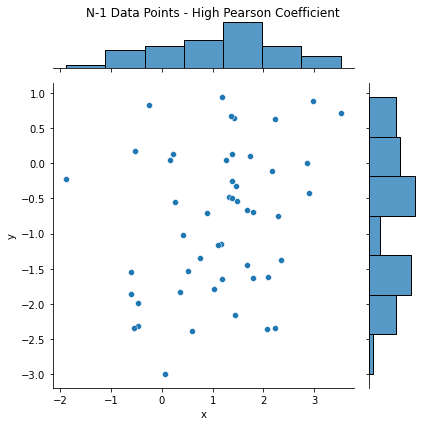

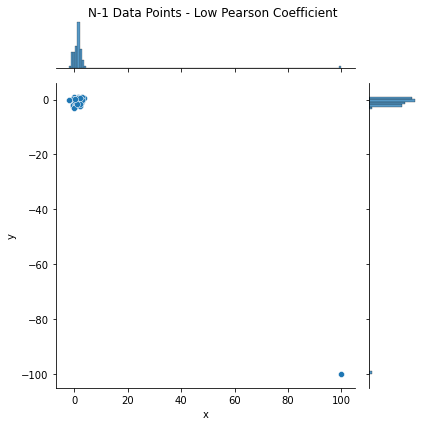

In [2]:
sig = np.array([[1,0.2],[0.2,1]])
X = stats.multivariate_normal([1,-1],sig)
df_high = pd.DataFrame(X.rvs(49), columns=['x', 'y'])
pearson_high = stats.pearsonr(df_high['x'], df_high['y'])[0]
print(df_high)
print(f"Pearson correlation coefficient for n-1 observations is {pearson_high:.2f} \n")

df_low = pd.concat([df_high, pd.DataFrame([[100, -100]], columns=['x','y'])], axis=0)
pearson_low = stats.pearsonr(df_low['x'], df_low['y'])[0]
print(df_low)
print(f"Pearson correlation coefficient for n observations is {pearson_low:.2f}\n:")

high = sns.jointplot(x=df_high['x'],y=df_high['y'])
high.fig.suptitle("N-1 Data Points - High Pearson Coefficient")
high.fig.tight_layout()
high.fig.subplots_adjust(top=0.95)
low = sns.jointplot(x=df_low['x'],y=df_low['y'])
low.fig.suptitle("N-1 Data Points - Low Pearson Coefficient")
low.fig.tight_layout()
low.fig.subplots_adjust(top=0.95)

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

#### Answer

Since Spearman Rho is sensitive to the volume of the rank mismatches and Kendall Tau is not, we'll create two identical arrays mess up the order of one the arrays:

     x   y  x_rank  y_rank  rank_diff
0    0  50     1.0    26.0       25.0
1    1  51     2.0    27.0       25.0
2    2  52     3.0    28.0       25.0
3    3  53     4.0    29.0       25.0
4    4  54     5.0    30.0       25.0
5    5  55     6.0    31.0       25.0
6    6  56     7.0    32.0       25.0
7    7  57     8.0    33.0       25.0
8    8  58     9.0    34.0       25.0
9    9  59    10.0    35.0       25.0
10  10  60    11.0    36.0       25.0
11  11  61    12.0    37.0       25.0
12  12  62    13.0    38.0       25.0
13  13  63    14.0    39.0       25.0
14  14  64    15.0    40.0       25.0
15  15  65    16.0    41.0       25.0
16  16  66    17.0    42.0       25.0
17  17  67    18.0    43.0       25.0
18  18  68    19.0    44.0       25.0
19  19  69    20.0    45.0       25.0
20  20  70    21.0    46.0       25.0
21  21  71    22.0    47.0       25.0
22  22  72    23.0    48.0       25.0
23  23  73    24.0    49.0       25.0
24  24  74    25.0    50.0       25.0
25  25  25  

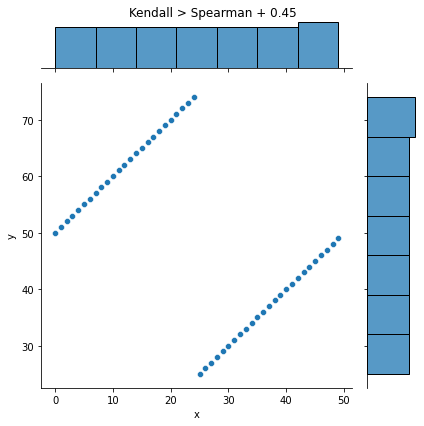

In [3]:
x = np.arange(0,50)
y = x*1
y[:25] = x[:25] + 50
df = pd.DataFrame([x,y]).T
df.columns=['x','y']
df['x_rank'] = df['x'].rank()
df['y_rank'] = df['y'].rank()
df['rank_diff'] = abs(df['x_rank'] - df['y_rank'])
kendall = df.corr(method='kendall').loc['x'].iloc[1]
spearman = df.corr(method='spearman').loc['x'].iloc[1]
k_s = sns.jointplot(x=df['x'], y=df['y'])
k_s.fig.suptitle("Kendall > Spearman + 0.45")
k_s.fig.tight_layout()
k_s.fig.subplots_adjust(top=0.95)
print(df)
print(f'Kendall Tau is {kendall:.3f} and Spearman is {spearman:.3f}. \nKendall is greater than Spearman by {(kendall - spearman):.3f}')

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

     x   y  x_rank  y_rank  rank_diff
0   50   0    26.0    50.0       24.0
1   51  -1    27.0    49.0       22.0
2   52  -2    28.0    48.0       20.0
3   53  -3    29.0    47.0       18.0
4   54  -4    30.0    46.0       16.0
5   55  -5    31.0    45.0       14.0
6   56  -6    32.0    44.0       12.0
7   57  -7    33.0    43.0       10.0
8   58  -8    34.0    42.0        8.0
9   59  -9    35.0    41.0        6.0
10  60 -10    36.0    40.0        4.0
11  61 -11    37.0    39.0        2.0
12  62 -12    38.0    38.0        0.0
13  63 -13    39.0    37.0        2.0
14  64 -14    40.0    36.0        4.0
15  65 -15    41.0    35.0        6.0
16  66 -16    42.0    34.0        8.0
17  67 -17    43.0    33.0       10.0
18  68 -18    44.0    32.0       12.0
19  69 -19    45.0    31.0       14.0
20  70 -20    46.0    30.0       16.0
21  71 -21    47.0    29.0       18.0
22  72 -22    48.0    28.0       20.0
23  73 -23    49.0    27.0       22.0
24  74 -24    50.0    26.0       24.0
25  25 -25  

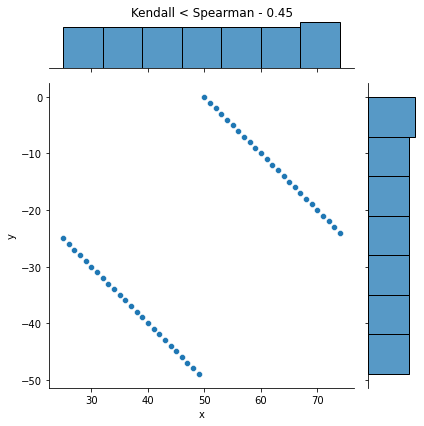

In [4]:
x = np.arange(0,50)
y = x*-1
x[:25] = x[:25] + 50
df = pd.DataFrame([x,y]).T
df.columns=['x','y']
df['x_rank'] = df['x'].rank()
df['y_rank'] = df['y'].rank()
df['rank_diff'] = abs(df['x_rank'] - df['y_rank'])
kendall = df.corr(method='kendall').loc['x'].iloc[1]
spearman = df.corr(method='spearman').loc['x'].iloc[1]
s_k = sns.jointplot(x=df['x'], y=df['y'])
s_k.fig.suptitle("Kendall < Spearman - 0.45")
s_k.fig.tight_layout()
s_k.fig.subplots_adjust(top=0.95)
print(df)
print(f'Kendall Tau is {kendall:.3f} and Spearman is {spearman:.3f}. \nSpearman is greater than Kendall by {(spearman - kendall):.3f}')

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

Pearson is -0.993 and Spearman is 0.164. 
Pearson is lower than Spearman by 1.157


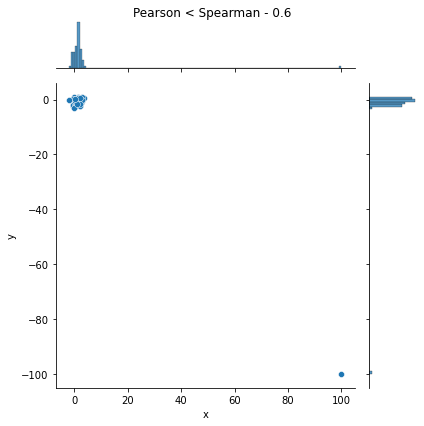

In [5]:
spearman_low = df_low.corr(method='spearman').loc['x'].iloc[1]
p_s = sns.jointplot(x=df_low['x'], y=df_low['y'])
p_s.fig.suptitle("Pearson < Spearman - 0.6")
p_s.fig.tight_layout()
p_s.fig.subplots_adjust(top=0.95)
print(f'Pearson is {pearson_low:.3f} and Spearman is {spearman_low:.3f}. \nPearson is lower than Spearman by {(spearman_low - pearson_low):.3f}')

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

In [ ]:
x = np.linspace(0, 1, 50)
y = x[::-1]
x[0] = y[0] = 10000
df = pd.DataFrame([x,y]).T
df.columns=['x','y']
df['rank_diff'] = abs(df['x'].rank() - df['y'].rank())
print(df)
spearman_e = df.corr(method='spearman').loc['x'].iloc[1]
pearson_e = df.corr().loc['x'].iloc[1]
p_s = sns.jointplot(x=df['x'], y=df['y'])
p_s.fig.suptitle("Pearson > Spearman + 1.2")
p_s.fig.tight_layout()
p_s.fig.subplots_adjust(top=0.95)

print(f'Pearson is {pearson_e:.3f} and Spearman is {spearman_e:.3f}. \nPearson is higher than Spearman by {(pearson_e - spearman_e):.3f}')


               x             y  rank_diff
0   10000.000000  10000.000000        0.0
1       0.020408      0.979592       47.0
2       0.040816      0.959184       45.0
3       0.061224      0.938776       43.0
4       0.081633      0.918367       41.0
5       0.102041      0.897959       39.0
6       0.122449      0.877551       37.0
7       0.142857      0.857143       35.0
8       0.163265      0.836735       33.0
9       0.183673      0.816327       31.0
10      0.204082      0.795918       29.0
11      0.224490      0.775510       27.0
12      0.244898      0.755102       25.0
13      0.265306      0.734694       23.0
14      0.285714      0.714286       21.0
15      0.306122      0.693878       19.0
16      0.326531      0.673469       17.0
17      0.346939      0.653061       15.0
18      0.367347      0.632653       13.0
19      0.387755      0.612245       11.0
20      0.408163      0.591837        9.0
21      0.428571      0.571429        7.0
22      0.448980      0.551020    

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

#### Answer

Since both Spearman and Kendall are rank-based correlation coefficient, they cannot have opposite directions. As shown above, they are both sensitive to different issues, but both have to go in the same direction. Since both of them range between -1 and 1, it's impossible fore one to be greater than the other by more than 1.

### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


In [ ]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [ ]:
df = pd.read_csv('heart.csv', index_col=False, sep='\t')

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

###### Handle missing values
First, we'll find the columns with missing values. Then, we'll map them by their type. Lastly, we'll fill the missing values according to their type:

In [ ]:
na = df.isna().sum().sort_values(ascending=False)
na = na[na > 0]
na

In [ ]:
CATEGORICAL_COLUMNS = {'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'}
NUMERICAL_COLUMNS = {'age', 'trestbps', 'chol', 'thalach', 'oldpeak'}
for i in na.index:
    if i in CATEGORICAL_COLUMNS:
        df[i].fillna(df[i].mode(), inplace=True)
    df[i].fillna(df[i].median(), inplace=True)

df.isna().sum().sort_values(ascending=False)

To check whether the healthy population's mean is larger/smaller than the disease population's mean, we'll compute the confidence interval of the two population and see if they overlap. If they do, then we can't say that the difference in means in significant. Otherwise, we'll compute whether the healthy population's mean is larger or smaller.

In [ ]:
ALPHA = 0.95
def compare_mean(col: str, a=ALPHA):
    healthy_s, disease_s = df[df.target == 0][col], df[df.target == 1][col]
    healthy_ci = stats.t.interval(alpha=a, df=len(healthy_s)-1, loc=healthy_s.mean(), scale=stats.sem(healthy_s))
    disease_ci = stats.t.interval(alpha=a, df=len(disease_s)-1, loc=disease_s.mean(), scale=stats.sem(disease_s))
    if check_overlap(healthy_ci, disease_ci, col)['is_overlapping']:
        return check_overlap(healthy_ci, disease_ci, col)['direction']
    return f'The difference in means for {col} is not significant.'

def check_overlap(healthy_ci: tuple, disease_ci: tuple, col: str):
    for t in healthy_ci:
        if disease_ci[0] < t < disease_ci[1]:
            return {
                'is_overlapping': False
            }
    if healthy_ci[0] > disease_ci[1]:
        return {
            'is_overlapping': True,
            'direction': f"Healthy population's mean for {col} is higher than the disease population's mean"
        }
    return {
        'is_overlapping': True,
        'direction': f"Healthy population's mean for {col} is lower than the disease population's mean"
    }


In [ ]:
for col in NUMERICAL_COLUMNS:
    print(compare_mean(col))

In [ ]:
sns.histplot(df['age'], bins=100, kde=True).set_title('Age Histogram')

The distribution seems like a Gaussian mixture:

In [ ]:
sns.distplot(df['trestbps'], bins=50, kde=True).set_title('Trestbps Histogram')

`Trstbps` looks like a Gaussian distribution

In [ ]:
sns.distplot(df['trestbps'], bins=50, kde=True, fit=stats.norm).set_title('Trestbps Histogram')

In [ ]:
sns.distplot(df['chol'], bins=50, kde=True).set_title('Chol Histogram')

`chol` looks like a Normal distribution as well:

In [ ]:
sns.distplot(df['chol'], bins=50, kde=True, fit=stats.norm).set_title('Chol Histogram')

In [ ]:
sns.distplot(df['thalach'], bins=50, kde=True).set_title('Thalach Histogram')

`thalach` looks like a Normal distribution as well:

In [ ]:
sns.distplot(df['thalach'], bins=50, kde=True, fit=stats.norm).set_title('Thalach Histogram')

In [ ]:
sns.distplot(df['oldpeak'], bins=50, kde=True).set_title('Oldpeak Histogram')

`oldpeak` looks like an Exponential distribution

In [ ]:
sns.distplot(df['oldpeak'], bins=50, kde=True, fit=stats.expon).set_title('Oldpeak Histogram')

In [ ]:
# * Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?


In [ ]:
combs = list(itertools.combinations(NUMERICAL_COLUMNS, 2))
for comb in combs:
    pearson_pval_female = stats.pearsonr(df[comb[0]][df.sex == 0], df[comb[1]][df.sex == 0])[1]
    pearson_pval_male = stats.pearsonr(df[comb[0]][df.sex == 1], df[comb[1]][df.sex == 1])[1]
    male_and_not_female = pearson_pval_male < 0.05 and pearson_pval_female > 0.05
    not_male_and_female = pearson_pval_male > 0.05 and pearson_pval_female < 0.05
    if male_and_not_female:
       print(f'The Pearson coefficient between {comb[0]} and {comb[1]} is significant for males and not for females')
    if not_male_and_female:
       print(f'The Pearson coefficient between {comb[0]} and {comb[1]} is significant for females and not for males')

In [ ]:
# * For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.


### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (15 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

##### Answer:
<b>Yes, it does<b>.

</br>
</br>

Let $Y = e^{X}$ be a random variable which is log-normal distributed, and X is standard normal distributed.

$$\lim_{x\to\infty} e^{tx}P(Y > x) = \lim_{x\to\infty} e^{tx}\big(1-P(e^X \leq x)\big) = \lim_{x\to\infty} e^{tx}\big(1-P(X \leq ln x)\big) = \lim_{x\to\infty} e^{tx}\big(1-\Phi(ln x)\big) = \lim_{x\to\infty} \frac{1-\Phi(ln x)}{e^{-tx}}$$

lopital rule --->
$$\lim_{x\to\infty} \frac{1-\Phi(ln x)}{e^{-tx}} = \lim_{x\to\infty} \frac{\phi(ln x)}{t \cdot e^{-tx}} = \lim_{x\to\infty} \frac{\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2} (ln x)^2}}{t \cdot x \cdot e^{-tx}} = \lim_{x\to\infty} \frac{e^{tx}} {\sqrt{2\pi} \cdot e^{\frac {(ln x)^2}{2}} \cdot t \cdot x} = \lim_{x\to\infty} \frac{e^{tx}} {\sqrt{2\pi} \cdot e^{0.5} \cdot t \cdot x^3}$$

more lopitals --->

$$\lim_{x\to\infty} \frac{e^{tx}} {\sqrt{2\pi} \cdot e^{0.5} \cdot t \cdot x^3} = .. = .. = \infty$$


To conclude,


$$\forall t > 0, \lim_{x\to\infty} e^{tx}P(Y > x) = \infty$$

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

$P(X_1 < X_2) = 
\int_0^\infty PDF_2(y) * CDF_1(X_1 < y) \;dy = \int_0^\infty \lambda_2 \cdot e^{-\lambda_2 y } (1 - e^{-\lambda_1 y }) \;dy = \frac{\lambda_1} {\lambda_1 + \lambda_2}
$

### Question 4 - CLT for Markov chains (15 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

#### 4.C
Draw normal fit curves on your two histograms.

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

#### 4.E - Bonus (5 Points)
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

### Question 5 - Distributions (15 Points)

Let $X$ be a random variable with a median value $Med(X) = m$. Recall that this means that $P(X\le m)=0.5$.

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Without loss generality, assume that the observations are sorted. That is, $x_1 \le x_2 \le ... \le x_n$. Also assume that $n$ is odd and $n > 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $x_i \le m$.

1. What is the distribution of $R$?
1. Given $n$, compute a function $\lambda (n)$ so that $P(x_{\lambda (n)} \le m) \ge 0.95)$ and $P(x_{\lambda (n)+1} \le m) < 0.95)$.

#### #1

We can look at: $R(\vec{x}(n))$ from another perspective: the number of samples that are lower than or equal to M.
</br>
What is the range R can take?
</br>
We "know" the median value of X. But that doesn't gurentee entything regarding samples.
</br>
So, R is in [0, n]. That is, all the samples could be bigger than M (R = 0) or all the samples could be lower than or equal to M (R = n, # of samples).
</br>
#### The Distribution of R ~ Binomial(p = $P(X\le m) = 0.5$, n = n = # of samples))
</br>

#### #2

Again, we can ask this question as follows: 
</br>
what is the <number_of_samples_given_n>(=$\lambda(n)$), that the probabilty to get at least <number_of_samples> lower than or equal to M is greater than or equal to 95% 
</br>
AND
</br>
the probabilty to get at least (<number_of_samples_given_n> + 1)(=$\lambda(n)$ + 1) lower than or equal to M is lower than 95% 

In [ ]:
from scipy.stats import binom


def return_lambda(n: int):
    
    binom_var = binom(p=0.5, n=n)
    # binom_var is the number of "successes", in this case: the number of samples lower than M
    
    for k in range(1, n):
        #print(1-binom_var.cdf(k))  # the probabilty for at least k samples to be <= M
        
        if (1-binom_var.cdf(k)) >= 0.95 and (1-binom_var.cdf(k+1)) < 0.95:
            result_lambda = k
            print(f"Lambda: {result_lambda}\n"
            f"1-binom_var.cdf({k}) = {1-binom_var.cdf(k):.3f}\n"
            f"1-binom_var.cdf({k+1}) = {1-binom_var.cdf(k+1):.3f}\n")
                  
            return result_lambda
        
    print("No such lambda found!")


In [ ]:
return_lambda(10001)